### Escrevendo e lendo arquivos em Pandas

normalmente na primeira célula se coloca os pacotes a serem importados

In [1]:
import os, sys
import pandas as pd # pandas e seu alias pd
import numpy as np  # numpy  e seu alias np

import matplotlib.pyplot as plt # matplotlib e seu alias plt
%matplotlib inline

### Onde posso consultar arquivos
  
Kaggle:
  - https://www.kaggle.com/datasets
  - https://www.kaggle.com/uciml/iris#

Public Domain Datasets
  - https://github.com/awesomedata/awesome-public-datasets
  - https://www.nature.com/sdata/policies/repositories

WHO (Organização Mundial de Saúde):
  - Health Info: https://www.who.int/healthinfo/en/
  - Global health Observatory: https://www.who.int/data/gho
  - Indicators: https://www.who.int/data/gho/data/indicators

University of Californa - Machine Learning Repository
  - https://archive.ics.uci.edu/ml/datasets/
  - Iris dataset (Ronald Fisher)
  - https://archive.ics.uci.edu/ml/datasets/iris
    
Brasil:
  - Tabnet: http://tabnet.datasus.gov.br/cgi/menu_tabnet_php.htm
  - INCA: https://www.inca.gov.br/estimativa
  - Oncocentro SP: http://www.fosp.saude.sp.gov.br/publicacoes/tabnet
  - Epidemiologia SP: https://portalsinan.saude.gov.br/calendario-epidemiologico
  - IBGE: https://downloads.ibge.gov.br/    https://downloads.ibge.gov.br/downloads_top.php

### Quais arquivos podemos abrir?

In [2]:
os.listdir("../data/")

['altitude.txt',
 'auto-mpg.data',
 'stm.txt',
 'velocities.txt',
 'stars.txt',
 'mycars.tsv',
 'circular.txt',
 'TB_data_dictionary_2020-09-11.csv',
 'Iris.csv',
 'TB_outcomes_2020-09-11.csv',
 'auto-mpg.names',
 '701bc260-f9ac-11ea-835b-2581c48bf88a.pdf',
 'database.sqlite',
 'auto-mpg.tsv',
 'exemplo_estranho.txt',
 'exemplo.html',
 'sunspots.txt']

### Pandas read csv (tsv)

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

### Tabela da Iris de Ronald Fisher & Edgar Anderson (1936)

https://en.wikipedia.org/wiki/Iris_flower_data_set

In [3]:
fname = "../data/Iris.csv"
os.path.exists(fname)

True

In [4]:
dfi = pd.read_csv(fname)
dfi.shape

(150, 6)

In [5]:
dfi.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
dfi.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


### Tabela de TB (tuberculose) da WHO

In [7]:
fname = "../data/TB_outcomes_2020-09-11.csv"
dftb = pd.read_csv(fname)
dftb.shape

(5109, 72)

In [8]:
dftb.head()

,country,iso2,iso3,iso_numeric,g_whoregion,year,rep_meth,new_sp_coh,new_sp_cur,new_sp_cmplt,...,mdr_coh,mdr_succ,mdr_fail,mdr_died,mdr_lost,xdr_coh,xdr_succ,xdr_fail,xdr_died,xdr_lost
0,Afghanistan,AF,AFG,4,EMR,1994,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AF,AFG,4,EMR,1995,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AF,AFG,4,EMR,1996,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AF,AFG,4,EMR,1997,100.0,2001.0,786.0,108.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AF,AFG,4,EMR,1998,100.0,2913.0,772.0,199.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### MPG - dados de carros

### Porque deu erro ???

veja que tem um '\t' no texto .... logo deve ser tsv (tab separated values)

In [9]:
fname = "../data/auto-mpg.data"
dftb = pd.read_csv(fname)
dftb.shape

(397, 1)

In [10]:
dftb.head()

,"18.0 8 307.0 130.0 3504. 12.0 70 1\tchevrolet chevelle malibu"""
0,15.0 8 350.0 165.0 3693. 11.5 70 ...
1,18.0 8 318.0 150.0 3436. 11.0 70 ...
2,16.0 8 304.0 150.0 3433. 12.0 70 ...
3,17.0 8 302.0 140.0 3449. 10.5 70 ...
4,15.0 8 429.0 198.0 4341. 10.0 70 ...


### usando sep = '\t'

Epa !!! parece não ter header!!!

In [11]:
fname = "../data/auto-mpg.data"
dftb = pd.read_csv(fname, sep='\t')
print(dftb.shape)
dftb.head()

(397, 2)


,18.0 8 307.0 130.0 3504. 12.0 70 1,"chevrolet chevelle malibu"""
0,15.0 8 350.0 165.0 3693. 11.5 70 1,"buick skylark 320"""
1,18.0 8 318.0 150.0 3436. 11.0 70 1,"plymouth satellite"""
2,16.0 8 304.0 150.0 3433. 12.0 70 1,"amc rebel sst"""
3,17.0 8 302.0 140.0 3449. 10.5 70 1,"ford torino"""
4,15.0 8 429.0 198.0 4341. 10.0 70 1,"ford galaxie 500"""


### Ao abrir uma tabela podemos ver linhas/colunas (shape), colunas (columns), head ou tail

In [12]:
fname = "../data/auto-mpg.data"
dftb = pd.read_csv(fname, sep='\t', header=None)
print(dftb.shape)
print(dftb.columns)
#--- limitando a 3 linhas
dftb.head(3)

(398, 2)
Int64Index([0, 1], dtype='int64')


,0,1
0,18.0 8 307.0 130.0 3504. 12.0 70 1,"chevrolet chevelle malibu"""
1,15.0 8 350.0 165.0 3693. 11.5 70 1,"buick skylark 320"""
2,18.0 8 318.0 150.0 3436. 11.0 70 1,"plymouth satellite"""


### Não dá para abrir !!!

ou edita-se via um programa (ler txt, readline())
ou edita-se manualmente ...

In [13]:
fname = "../data/auto-mpg.tsv"
dfm = pd.read_csv(fname, sep='\t')
print(dfm.shape)
print(dfm.columns)
#--- limitando a 3 linhas
dfm.head(3)

(398, 9)
Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name'],
      dtype='object')


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite


### Exemplo de pergunta: quantos carros com quantos cilindros temos?

In [14]:
dfm.cylinders.unique()

array([8, 4, 6, 3, 5])

In [15]:
dfgby = dfm.groupby('cylinders').count()
print(dfgby.columns)
dfgby

Index(['mpg', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year', 'origin', 'car_name'],
      dtype='object')


,mpg,displacement,horsepower,weight,acceleration,model_year,origin,car_name
cylinders,,,,,,,,
3,4,4,4,4,4,4,4,4
4,204,204,200,204,204,204,204,203
5,3,3,3,3,3,3,3,3
6,84,84,83,84,84,84,84,84
8,103,103,103,103,103,103,103,103


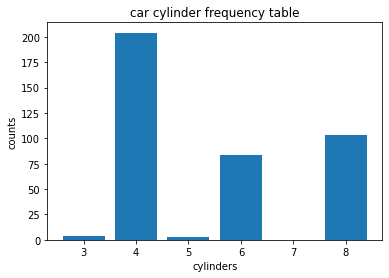

In [16]:
plt.bar(dfgby.index, dfgby.mpg)
plt.xlabel("cylinders")
plt.ylabel("counts")
plt.title("car cylinder frequency table");

### Vamos entender tudo o que fizemos e como funciona o pandas ...

vamos utilizar a tabel mpg (carros)

e você repete tudo com a tabel da who (tuberculose), ok?

### Como obter as colunas de uma tabela?

In [17]:
dfm.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name'],
      dtype='object')

### Contando o número de colunas = len(df.columns)

In [18]:
len(dfm.columns)

9

### Contando linhas e colunas

In [19]:
dfm.shape

(398, 9)

In [20]:
"a tabela dfm tem %d linas, e %d colunas"%(dfm.shape[0], dfm.shape[1])

'a tabela dfm tem 398 linas, e 9 colunas'

### As duas formas de contar linhas

In [21]:
dfm.shape[0], len(dfm), dfm.shape[0] == len(dfm)

(398, 398, True)

### Como selecinar colunas

dfm[ lista_colunas ]

In [22]:
dfm.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name'],
      dtype='object')

In [23]:
dfm[ ['mpg', 'cylinders', 'displacement', 'horsepower', 'car_name']].head()

,mpg,cylinders,displacement,horsepower,car_name
0,18.0,8,307.0,130.0,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,buick skylark 320
2,18.0,8,318.0,150.0,plymouth satellite
3,16.0,8,304.0,150.0,amc rebel sst
4,17.0,8,302.0,140.0,ford torino


### todas as colunas que tenha a letra 'a'

In [24]:
cols = []
for col in dfm.columns:
    if 'a' in col:
        cols.append(col)
        
cols

['displacement', 'acceleration', 'model_year', 'car_name']

In [25]:
dfm[ cols ].tail(3)

,displacement,acceleration,model_year,car_name
395,135.0,11.6,82,dodge rampage
396,120.0,18.6,82,ford ranger
397,119.0,19.4,82,chevy s-10


### este looping é muito comprido, via comprehension é muito mais fácils

In [26]:
cols = [col for col in dfm.columns if 'a' in col]
cols

['displacement', 'acceleration', 'model_year', 'car_name']

### somente as linhas ímpares

In [27]:
nrow = len(dfm)
nrow

398

In [28]:
np.arange(1, 11, 2)

array([1, 3, 5, 7, 9])

In [29]:
nrows = np.arange(1, len(dfm), 2)
nrows[:10]

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

### usando o comando iloc - index location

acompanhe o index em head() e tail()

In [30]:
dfm.iloc[nrows].head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500


In [31]:
dfm.iloc[nrows].tail(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
397,31.0,4,119.0,82.0,2720.0,19.4,82,1,chevy s-10


### Filtrando colunas e linhas

  - quero o nome do carro, mpg, cylinders
  - quero também as 5 primeiras linhas
  - repare que posso encadeiar comandos

In [32]:
dfm.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name'],
      dtype='object')

In [33]:
dfm[ ['car_name', 'mpg', 'cylinders',]].iloc[:5]

,car_name,mpg,cylinders
0,chevrolet chevelle malibu,18.0,8
1,buick skylark 320,15.0,8
2,plymouth satellite,18.0,8
3,amc rebel sst,16.0,8
4,ford torino,17.0,8


## Criando dataframes

### Quero inventar 5 carros
  - Definirei aleatoriamente os cilindros
  - Definirei aleatoriamente a autonomia (displacement)
  - e ao fim vou gravar

In [34]:
carros = ['fusquinha', 'jaguar', 'opala', 'jet-car', 'chevy']
carros, type(carros), len(carros)

(['fusquinha', 'jaguar', 'opala', 'jet-car', 'chevy'], list, 5)

In [35]:
# criando uma lista de numeros randômicos entre 4 e 12
cilindros = np.random.randint(4, 12+1, 5)
cilindros

array([12, 10,  8,  5,  5])

In [36]:
# a autonomia seque uma equação linear descrescente
# quanto mais cilindros cai e 10 km a autonomia
# um tanque de 40 litros tem uma autonomia 400 km

# se 5 cilindros
cil = 5
autonomia = 400 - 10*(cil-4)
autonomia

390

In [37]:
autonomias = [400 - 10*(cil-4) for cil in cilindros]
autonomias

[320, 340, 360, 390, 390]

In [38]:
#-- montando o dataframe
dfmycars = pd.DataFrame([carros, cilindros, autonomias])
dfmycars

,0,1,2,3,4
0,fusquinha,jaguar,opala,jet-car,chevy
1,12,10,8,5,5
2,320,340,360,390,390


In [39]:
dfmycars = pd.DataFrame([carros, cilindros, autonomias]).T
dfmycars

,0,1,2
0,fusquinha,12,320
1,jaguar,10,340
2,opala,8,360
3,jet-car,5,390
4,chevy,5,390


In [40]:
dfmycars = pd.DataFrame([carros, cilindros, autonomias]).T
dfmycars.columns = ['nome_carro', 'cilindros', 'autonomia_km']
dfmycars

,nome_carro,cilindros,autonomia_km
0,fusquinha,12,320
1,jaguar,10,340
2,opala,8,360
3,jet-car,5,390
4,chevy,5,390


### gravando em ../data

In [41]:
### se a tabela existe, mate-a
fname = "../data/mycars.tsv"

if os.path.exists(fname):
    os.remove(fname)

In [42]:
existia = os.path.exists(fname)
ret = dfmycars.to_csv(fname, sep='\t')
existia, ret, os.path.exists(fname)

(False, None, True)

In [43]:
dfmycars2 = pd.read_csv(fname, sep='\t')
dfmycars2

,Unnamed: 0,nome_carro,cilindros,autonomia_km
0,0,fusquinha,12,320
1,1,jaguar,10,340
2,2,opala,8,360
3,3,jet-car,5,390
4,4,chevy,5,390


In [44]:
# não grave o índice
ret = dfmycars.to_csv(fname, sep='\t', index=False)
dfmycars2 = pd.read_csv(fname, sep='\t')
dfmycars2

,nome_carro,cilindros,autonomia_km
0,fusquinha,12,320
1,jaguar,10,340
2,opala,8,360
3,jet-car,5,390
4,chevy,5,390


Text(0.5, 1.0, 'meus carros - adoro fuskinha')

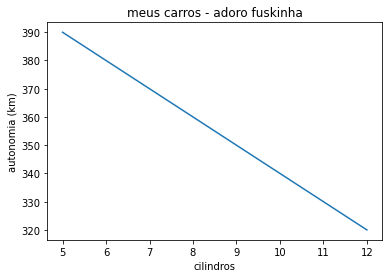

In [45]:
plt.plot(dfmycars2.cilindros, dfmycars2.autonomia_km)
plt.xlabel("cilindros")
plt.ylabel("autonomia (km)")
plt.title("meus carros - adoro fuskinha")

### Como amplio e gravo esta figura??

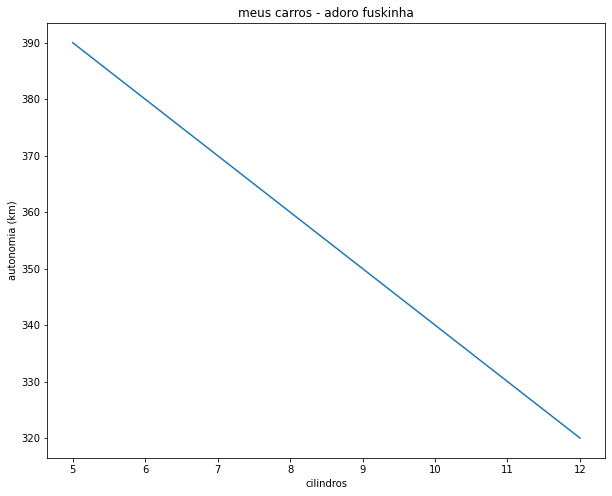

In [58]:
fig = plt.figure(figsize=(10,8))

plt.plot(dfmycars2.cilindros, dfmycars2.autonomia_km)
plt.xlabel("cilindros")
plt.ylabel("autonomia (km)")
plt.title("meus carros - adoro fuskinha");

### removendo arquivos e pastas

  - os.remove(file) = remove um arquivo
  - os.rmdir(direcory) = remove um diretório vazio
  - shutil.rmtree('/folder_name') = remove um diretório com dados 

In [49]:
# mas, para isto, preciso da biblioteca (pacote) shutil
import shutil

if os.path.exists("../figure"):
    shutil.rmtree("../figure")

In [50]:
### opsss deu erro ! não tenho este diretório
plt.savefig("../figure/meucarro.png", dpi=150)

FileNotFoundError: [Errno 2] No such file or directory: '../figure/meucarro.png'

<Figure size 432x288 with 0 Axes>

In [57]:
### opsss deu erro ! não tenho este diretório
plt.savefig("../figure/meucarro.png", dpi=150)

FileExistsError: [Errno 17] File exists: '../figure'

### Como contornar o problema de criar diretórios

In [55]:
#-- há duas formas de sair deste erro:
#-- 1a. perguntando se o diretório existe,
if not os.path.exists(dir_figura):
    os.mkdir(dir_figura)

In [56]:
#-- 2a. com try / exception

try:
    # tente (try) 
    os.mkdir(dir_figura)
except:
    # se der erro, passe, vá adiante
    pass

### Código correto ... + salvando arquivo 'png'

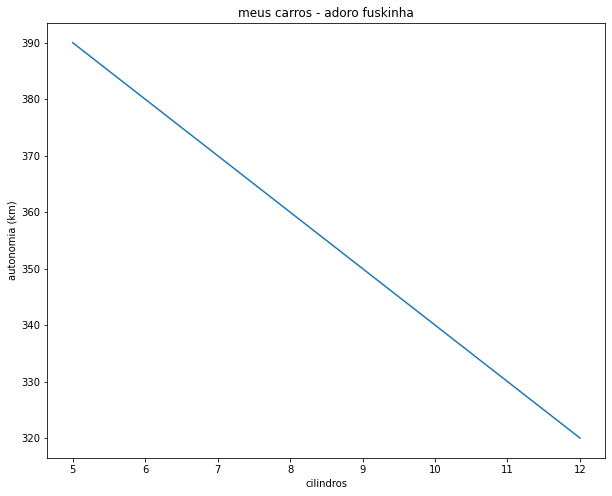

In [66]:
try:
    os.mkdir("../figure")
except:
    pass

figname = "../figure/carro_rendimento_por_cilindro.png"

fig = plt.figure(figsize=(10,8))

plt.plot(dfmycars2.cilindros, dfmycars2.autonomia_km)
plt.xlabel("cilindros")
plt.ylabel("autonomia (km)")
plt.title("meus carros - adoro fuskinha");
plt.savefig(figname, dpi=150);

In [67]:
os.path.exists(figname)

True

### Abrindo um arquivo imagem com PIL.image

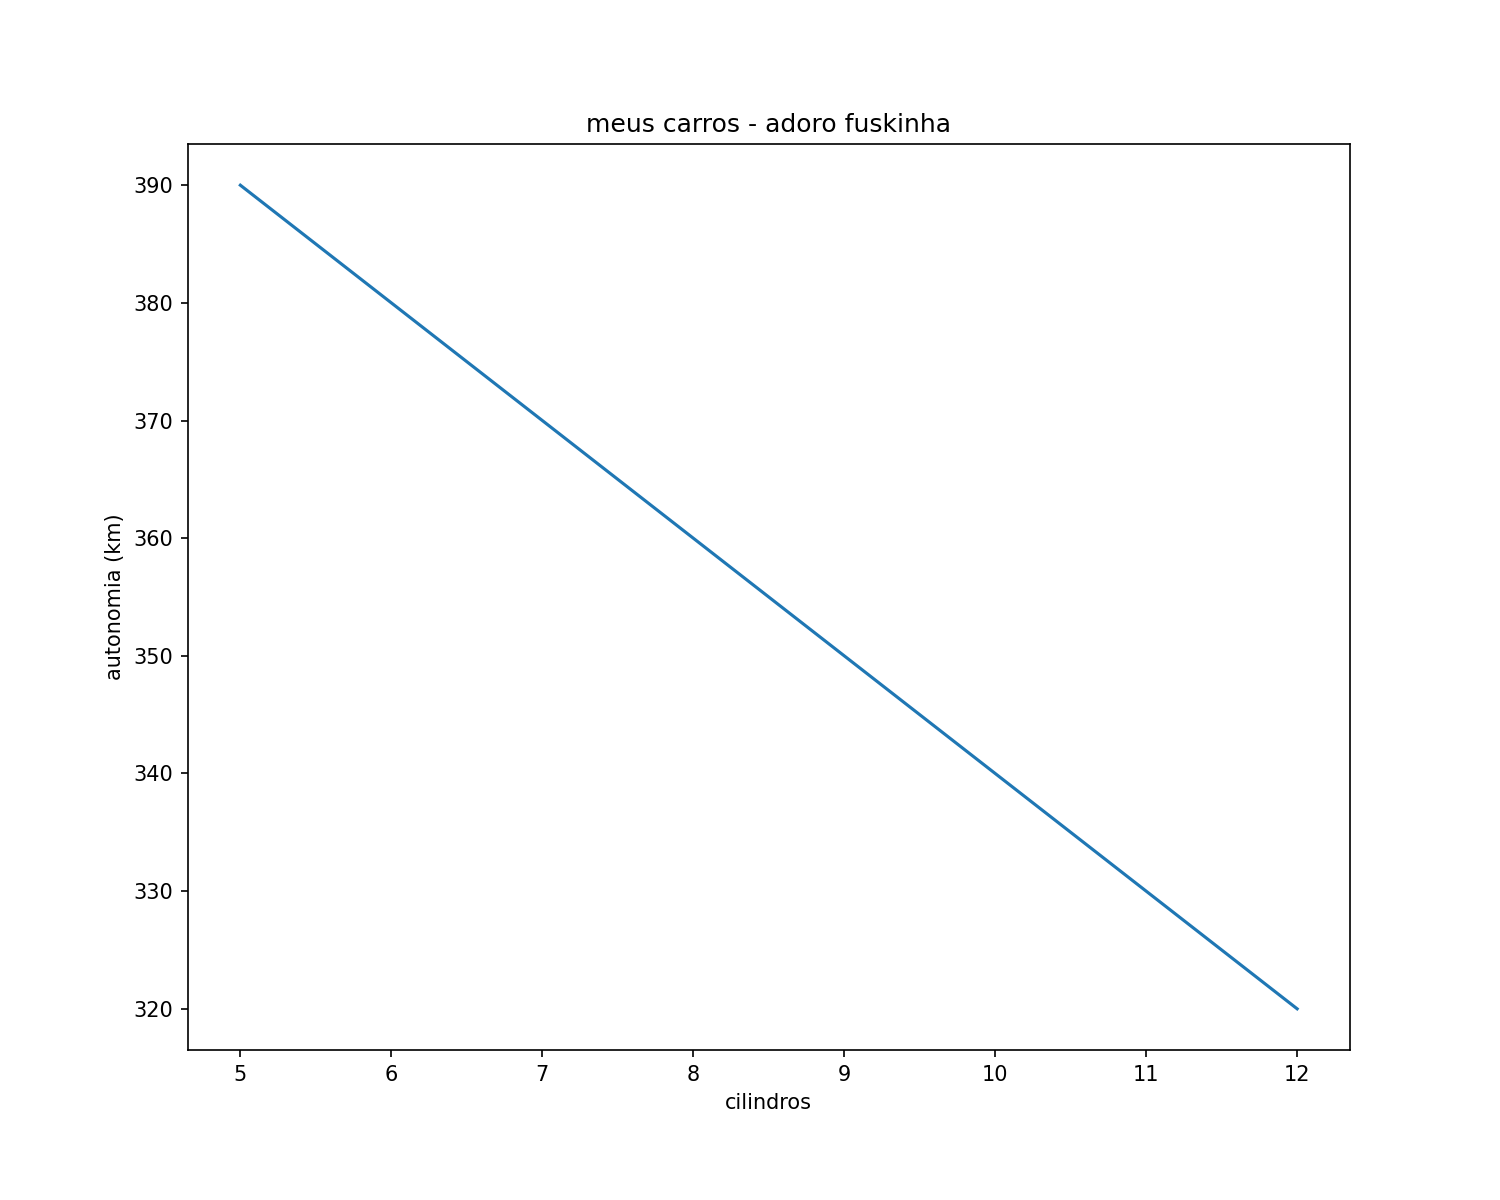

In [69]:
from PIL import Image

im = Image.open(figname)
im

### Melhorando o plot, controlando fontes (tipo de lebra, tamanho e cor)

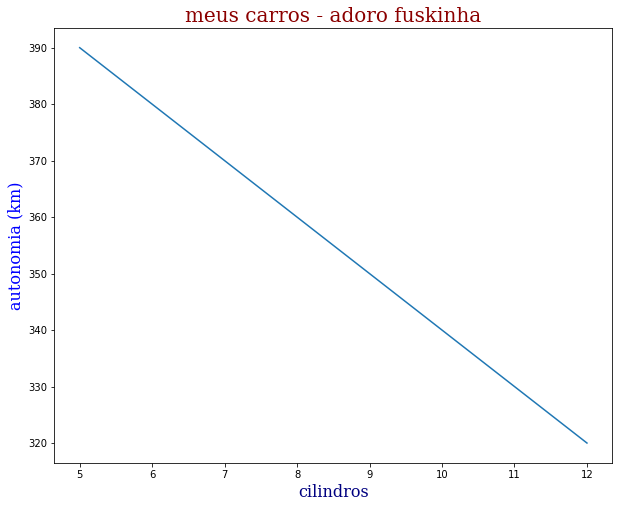

In [72]:
font_title = {'family': 'serif',
              'color':  'darkred',
              'size': 20,
             }

font_xlab = {'family': 'serif',
             'color':  'navy',
             'size': 16,
            }

font_ylab = {'family': 'serif',
             'color':  'blue',
             'size': 16,
            }

try:
    os.mkdir("../figure")
except:
    pass

figname = "../figure/carro_rendimento_por_cilindro_better_font.png"

fig = plt.figure(figsize=(10,8))

plt.plot(dfmycars2.cilindros, dfmycars2.autonomia_km)
plt.xlabel("cilindros", fontdict=font_xlab)
plt.ylabel("autonomia (km)", fontdict=font_ylab)
plt.title("meus carros - adoro fuskinha", fontdict=font_title);
plt.savefig(figname, dpi=150);


### O que é dictionary? para que serve?

font_ylab = {'family': 'serif',  
             'color':  'blue',  
             'size': 16,  
            }

dict == {}